In [1]:
import json
import numpy as np
import pandas as pd
import requests

In [3]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

In [4]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


<ipython-input-4-710df0c3812b>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


In [5]:
record_date = '2020-08-30'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-29T23:28:21  5958902  182718    2140614
1      BR  2020-08-29T23:28:21  3846153  120262    3199206
2      IN  2020-08-29T23:28:21  3463972   62550    2648998
3      RU  2020-08-29T23:28:21   982573   16977     802365
4      PE  2020-08-29T23:28:21   629961   28471     429662


<ipython-input-5-ae1d1d4df9bf>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


In [6]:
record_date = '2020-09-13'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-09-12T23:26:14  6479157  193539    2434658
1      IN  2020-09-12T23:26:14  4659984   77472    3624196
2      BR  2020-09-12T23:26:14  4282164  130396    3695158
3      RU  2020-09-12T23:26:14  1053663   18426     871000
4      PE  2020-09-12T23:26:14   716670   30470     544745


<ipython-input-6-e23f74e758d3>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


In [7]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [8]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


<ipython-input-8-89c7c785ff58>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries = pd.io.json.json_normalize(get_json(countries_url))


In [21]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-09-12  6479157  193539    2434658  United States of America
1      IN  2020-09-12  4659984   77472    3624196                     India
2      BR  2020-09-12  4282164  130396    3695158                    Brazil
3      RU  2020-09-12  1053663   18426     871000        Russian Federation
4      PE  2020-09-12   716670   30470     544745                      Peru


In [27]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [11]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

In [28]:
df_top_10_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(10)

In [29]:
import matplotlib.pyplot as plt

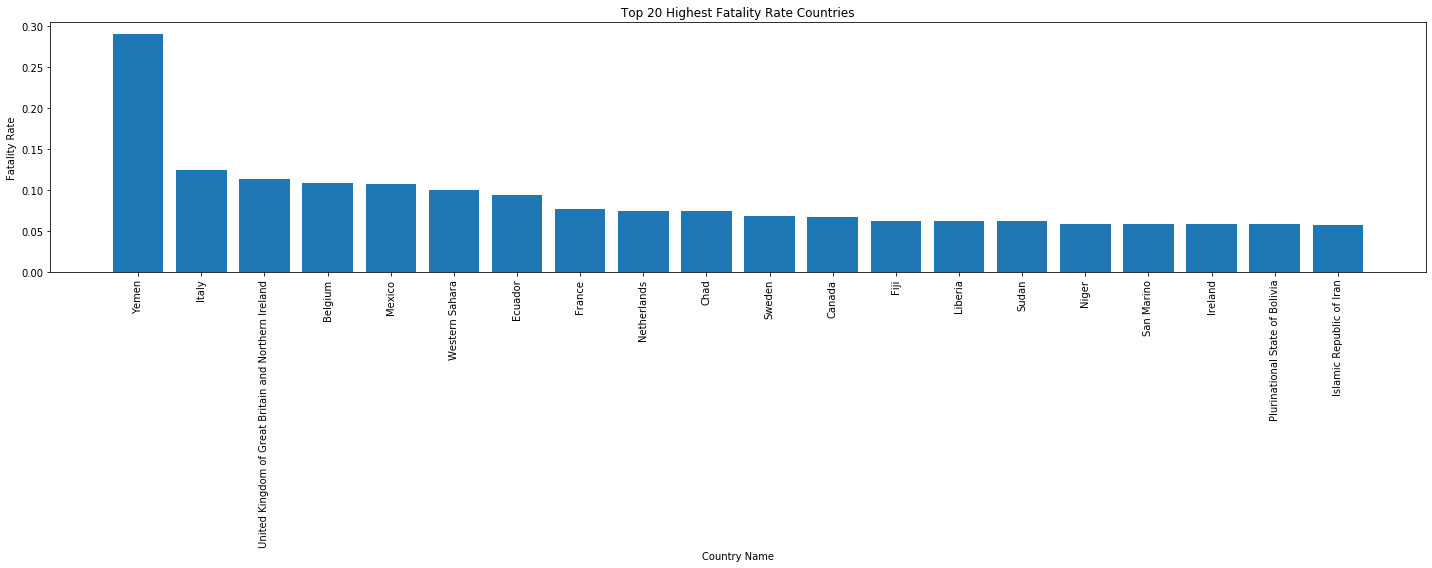

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.savefig('Top 20 Highest Fatality Rate Countries.png')
plt.tight_layout()
plt.show()

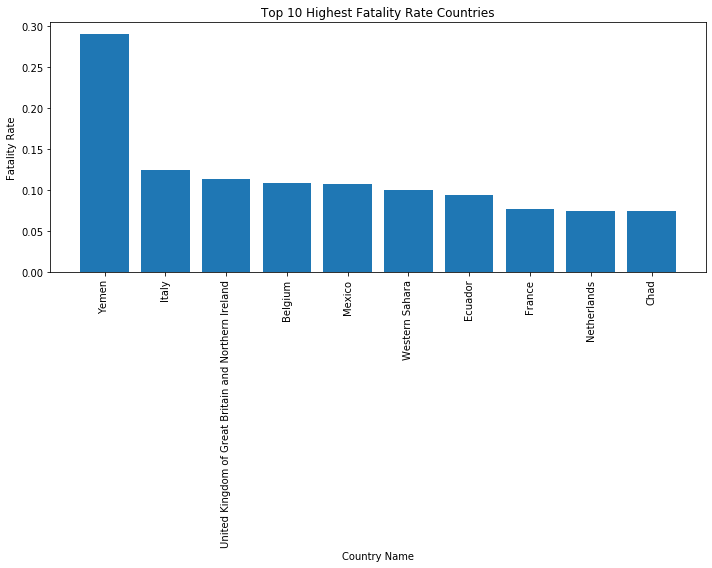

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
x = df_top_10_fatality_rate['name']
y = df_top_10_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 10 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.savefig('Top 10 Highest Fatality Rate Countries.png')
plt.tight_layout()
plt.show()

In [14]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
print(df_covid_timeline_merged.head())

<ipython-input-14-2350234bd5bc>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))


  country last_update  cases  deaths  recovered
0      VN  2020-09-14   1063      35        918
1      VN  2020-09-13   1063      35        918
2      VN  2020-09-12   1060      35        902
3      VN  2020-09-11   1060      35        902
4      VN  2020-09-10   1059      35        893


In [15]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [16]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

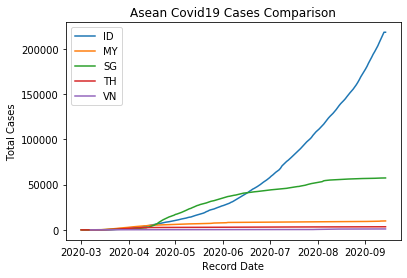

In [19]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.savefig('Asean Covid19 Case Comparison.png')
plt.show()

In [18]:
print(df_countries)

               name country
0       Afghanistan      AF
1           Albania      AL
2           Algeria      DZ
3           Andorra      AD
4            Angola      AO
..              ...     ...
201        Viet Nam      VN
202  Western Sahara      EH
203           Yemen      YE
204          Zambia      ZM
205        Zimbabwe      ZW

[206 rows x 2 columns]
